## Titanic: Machine Learning from Disaster
Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## import libraries and data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


preview the data.

In [58]:
train_df.info()
print('---')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null f

## feature cleaning
- some features has NaN values needed to be filled.
- we can drop some features: PassengerId,Name,Ticket
- we will drop cabin because too many NaN.

In [59]:
train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

### embark

we look at embark feature. things to do.
- Is it important feature to keep?
- If so, how to change it to number?
- how to fill NaN?


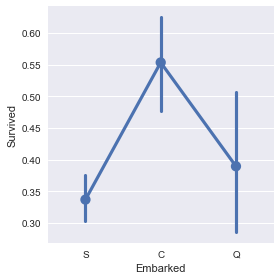

In [60]:
sns.factorplot(x='Embarked',y='Survived',data = train_df)

survival rate: C>Q>S. we should keep the features.

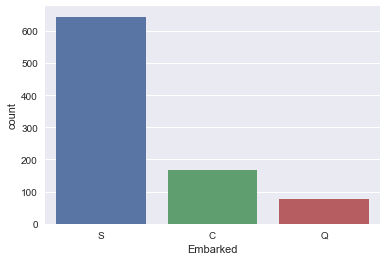

In [61]:
sns.countplot(x='Embarked',data = train_df)

more S. consider fill the NaN with S.

In [62]:
train_df.Embarked = train_df.Embarked.fillna('S')

now change the features into integer. using get dummies.

In [63]:
embark_dum_train = pd.get_dummies( train_df.Embarked)
embark_dum_test = pd.get_dummies( test_df.Embarked)

In [64]:
train_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1,inplace=True)

In [65]:
train_df = train_df.join(embark_dum_train)
test_df = test_df.join(embark_dum_test)

### Fare
- is it important feature?

(-10, 200)

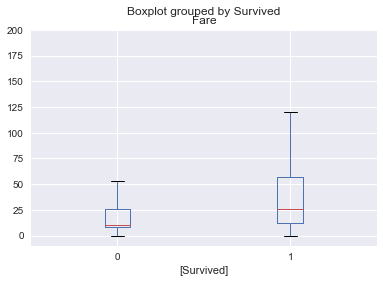

In [66]:
train_df[['Fare','Survived']].boxplot(by='Survived')
plt.ylim(-10,200)

survival rate is higher when fare is higher.

In [67]:
# fill NaN in test set
test_df.Fare.fillna(test_df.Fare.median(),inplace=True)

### Age

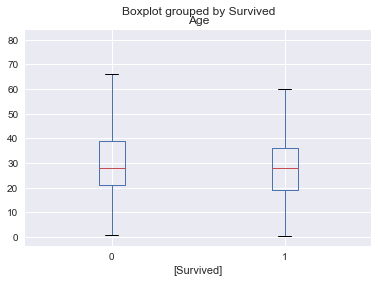

In [68]:
train_df[['Age','Survived']].boxplot(by='Survived')

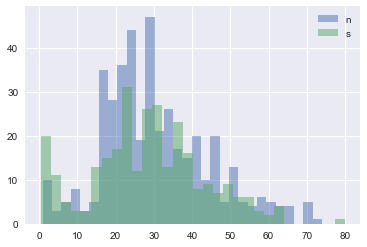

In [69]:
train_df[train_df['Survived']==0]['Age'].hist(bins=30,alpha=0.5,label='n')
train_df[train_df['Survived']==1]['Age'].hist(bins=30,alpha=0.5,label='s')
plt.legend()

In [70]:
## decide to keep. now have to fill in NaN while keep the distribution.
average_age_train = train_df.Age.mean()
std_age_train = train_df.Age.std()
nan_age_train = train_df.Age.isnull().sum()

average_age_test = test_df.Age.mean()
std_age_test = test_df.Age.std()
nan_age_test = test_df.Age.isnull().sum()

In [71]:
rand_train = np.random.randint(average_age_train-std_age_train,
                            average_age_train+std_age_train,
                           size = nan_age_train)
rand_test = np.random.randint(average_age_test-std_age_test,
                            average_age_test+std_age_test,
                           size = nan_age_test)

In [72]:
train_df['Age'][np.isnan(train_df.Age)] = rand_train
test_df['Age'][np.isnan(test_df.Age)] = rand_test

/Users/yongsingyou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yongsingyou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


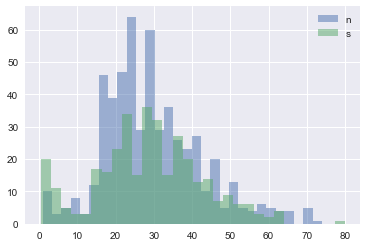

In [73]:
train_df[train_df['Survived']==0]['Age'].hist(bins=30,alpha=0.5,label='n')
train_df[train_df['Survived']==1]['Age'].hist(bins=30,alpha=0.5,label='s')
plt.legend()

### Family

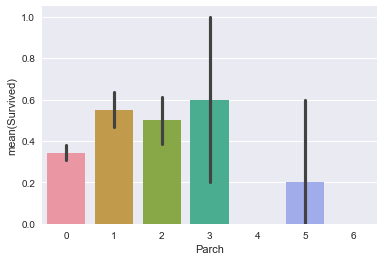

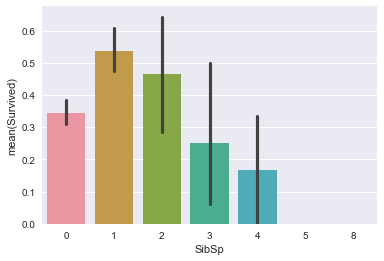

In [74]:
sns.barplot(x='Parch',y='Survived',data=train_df)
plt.show()
sns.barplot(x='SibSp',y='Survived',data=train_df)

In [75]:
## we add up them and put it into two categories: alone or family.
train_df['Family'] = train_df.Parch + train_df.SibSp
test_df['Family'] = test_df.Parch + test_df.SibSp

In [76]:
train_df.Family.loc[train_df.Family>0] = 1
test_df.Family.loc[test_df.Family>0] = 1

/Users/yongsingyou/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
train_df.drop(['Parch','SibSp'],axis=1,inplace=True)
test_df.drop(['Parch','SibSp'],axis=1,inplace=True)

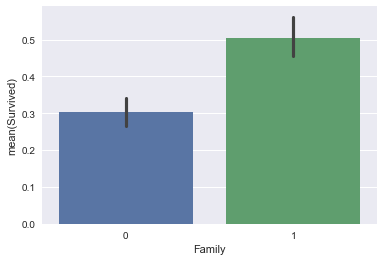

In [78]:
sns.barplot(x='Family',y='Survived',data= train_df)

### Sex

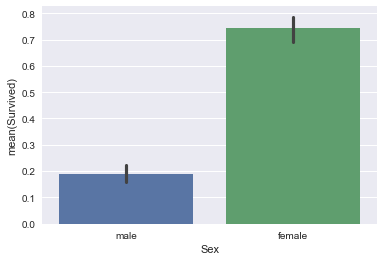

In [79]:
sns.barplot(train_df.Sex, train_df.Survived, data = train_df)

sex is a strong feature in deciding survival rate.

In [80]:
# categorize 
train_df.Sex.loc[train_df.Sex =='female'] = 1
train_df.Sex.loc[train_df.Sex =='male'] = 0

/Users/yongsingyou/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
test_df.Sex.loc[test_df.Sex =='female'] = 1
test_df.Sex.loc[test_df.Sex =='male'] = 0

/Users/yongsingyou/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
train_df.Sex = train_df.Sex.astype(int)
test_df.Sex = test_df.Sex.astype(int)

### Pclass

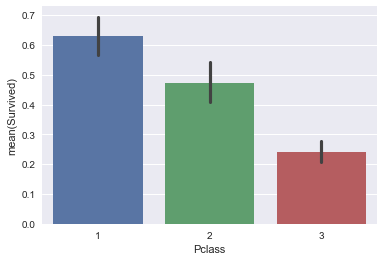

In [83]:
sns.barplot(train_df.Pclass, train_df.Survived,data=train_df)

### correlation matrix

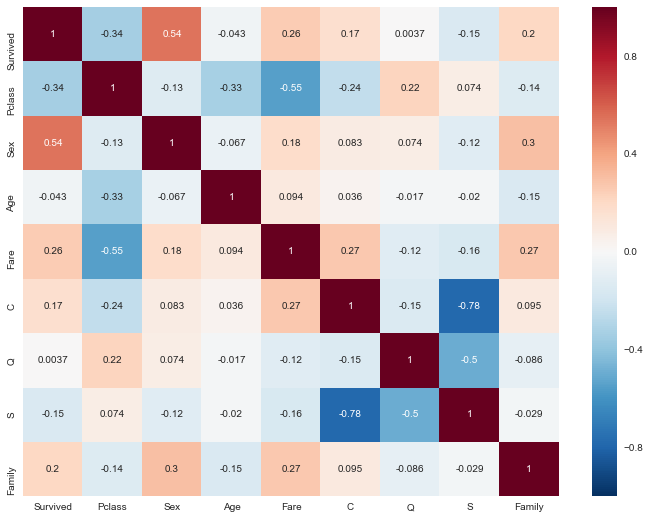

In [84]:
plt.subplots(figsize=(12,9))
corrmat = train_df.corr()
sns.heatmap(corrmat,annot=True)

## Model
- why choose this model?
- how to verify the model?
- how to intepret the performance?

In [131]:
from sklearn.model_selection import train_test_split
X_a = train_df.drop('Survived',axis=1)
y_a = train_df.Survived

X_train,X_test,y_train,y_test = train_test_split(X_a,y_a)

In [86]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf)

/Users/yongsingyou/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [161]:
y_pred = tree_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       143
          1       0.90      0.89      0.89        80

avg / total       0.92      0.92      0.92       223



In [106]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
print(classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.87      0.73      0.79       176
          1       0.37      0.60      0.46        47

avg / total       0.76      0.70      0.72       223



In [107]:
f1_score(y_test,y_pred)

0.45528455284552843

In [108]:
from sklearn.metrics import f1_score,confusion_matrix, roc_curve
f1_score(y_test,y_pred)

0.45528455284552843

In [98]:
confusion_matrix(y_test,y_pred)

array([[128,  19],
       [ 48,  28]])

In [103]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)
f1_score(y_test,y_pred)


/Users/yongsingyou/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.55474452554744524

In [171]:
y_t.shape,y_scores.shape

((668,), (668, 2))

In [172]:
fpr, tpr, thresholds = roc_curve(y_t,y_scores[:,1])

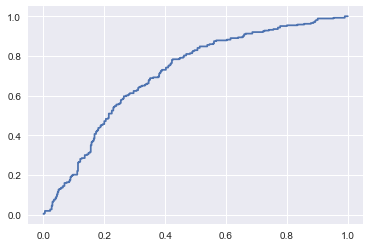

In [174]:
plt.plot(fpr,tpr)

In [162]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(tree_clf,X_train,y_train,cv=3,method='decision_function')

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [159]:
from sklearn.metrics import precision_recall_curve
pre, rec, thr = precision_recall_curve(y_t,y_scores[:,1])

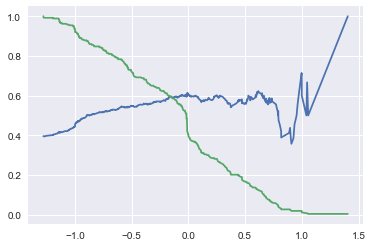

In [160]:
plt.plot(thr,pre[:-1])
plt.plot(thr,rec[:-1])

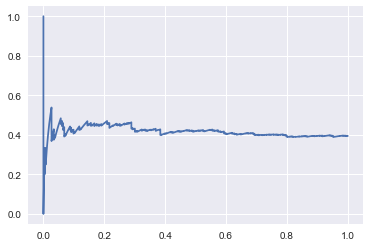

In [157]:
plt.plot(rec,pre)

In [144]:
y_scores[:,1].shape

(668,)